**                   HMO Data for Barnet Floor and Tenants Charts**

**---------------------------------**

       Barnet Floor Chart                                  Barnet Tenants Charts


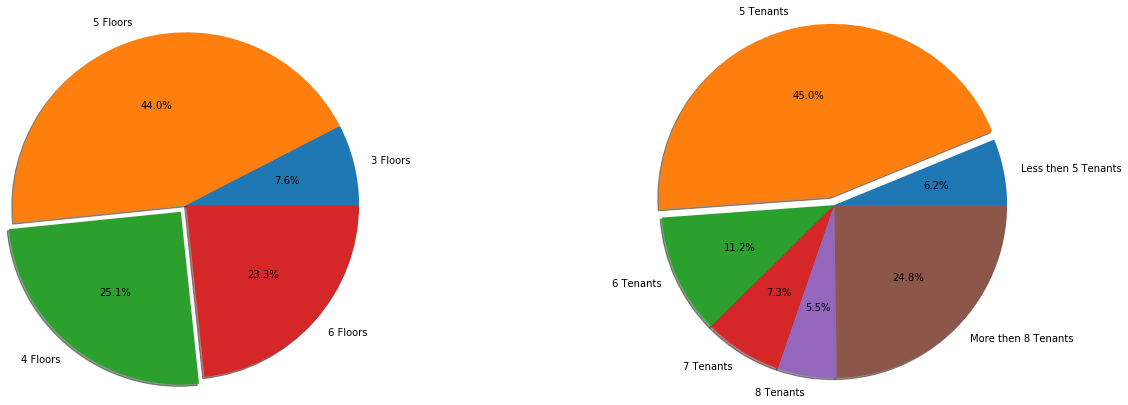

In [2]:
from pandas.io.json import json_normalize
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.gridspec import GridSpec
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd('**                   HMO Data for Barnet Floor and Tenants Charts**')
printmd('**---------------------------------**')
a = "       Barnet Floor Chart                                  Barnet Tenants Charts"
print(a)

client = MongoClient()
db = client.test
collection = db['HmoListBarnet']
cursor = list(collection.find({}, {'_id': False}))
result = json_normalize(cursor)
threerooms=0
fourroom=0
sixroom=0
fiveroom=0
lessthenfive=0
fiveTenants=0
sixTenants=0
seventenents=0
eighttenents=0
ninetenents=0
greatertheneight=0

for index, row in result.iterrows():
    if int(row['PermittedNumberofOccupants']) < 5:
        lessthenfive=lessthenfive+1
    if int(row['PermittedNumberofOccupants']) == 5:
        fiveTenants=fiveTenants+1
    elif int(row['PermittedNumberofOccupants']) == 6:
        sixTenants=sixTenants+1
    elif int(row['PermittedNumberofOccupants']) == 7:
        seventenents=seventenents+1
    elif int(row['PermittedNumberofOccupants']) == 8:
        eighttenents=eighttenents+1
    elif int(row['PermittedNumberofOccupants']) > 8:
        greatertheneight=greatertheneight+1


the_grid = GridSpec(1, 2)

for index, row in result.iterrows():
    if int(row['Rooms']) == 3:
        threerooms=threerooms+1
    elif int(row['Rooms']) == 4:
        fourroom=fourroom+1
    elif int(row['Rooms']) == 5:
        fiveroom=fiveroom+1
    elif int(row['Rooms']) == 6:
        sixroom=sixroom+1

        
labels =  '3 Floors', '5 Floors', '4 Floors', '6 Floors' 
sizes = [threerooms, fiveroom,fourroom, sixroom]
explode = (0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


labels1 =  'Less then 5 Tenants', '5 Tenants', '6 Tenants', '7 Tenants', '8 Tenants' ,  'More then 8 Tenants'
sizes1 = [lessthenfive,fiveTenants, sixTenants, seventenents,eighttenents,greatertheneight]
explode1 = (0, 0.1, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.subplot(the_grid[0, 0], aspect=1)
plt.subplots_adjust(left=1, bottom=1, right=3, top=2, wspace=2, hspace=2)


plt.pie(sizes, explode=explode,
                                    labels=labels, autopct='%1.1f%%',
                                    shadow=True, radius=2.0)

plt.subplot(the_grid[0, 1], aspect=1)

plt.pie(sizes1, explode=explode1,
                                    labels=labels1, autopct='%1.1f%%',
                                    shadow=True, radius=2.0)



plt.show()

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


